# Web scraping

In this project, we are going to obtain and analyze data about Tesla's profit, which we will previously store in a DataFrame and in a sqlite database.

## Step 1: Install dependencies

Make sure you have the Python `Pandas` and `requests` packages installed to be able to work on the project.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import requests
import time 
from bs4 import BeautifulSoup
import sqlite3

## Step 2: Download HTML

The download of the HTML of the web page will be done with the `requests` library, as we saw in the module theory.

The web page we want to scrape is the following: https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue. It collects and stores information about the growth of the company every three months, since June 2009. It stores the text scraped from the web in some variable.

In [2]:
resource_url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

In [3]:
response = requests.get(resource_url, time.sleep(10))

In [4]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

response = requests.get(resource_url, headers=headers)


In [5]:
soup = BeautifulSoup(response.text, 'html')

## Step 3: Transform the HTML

The next step to start extracting the information is to transform it into a structured object. Do this using `BeautifulSoup`. Once you have interpreted the HTML correctly, parse it to:

1. Find all the tables.
2. Find the table with the quarterly evolution.
4. Store the data in a DataFrame.


In [6]:
# Find main content container
main_content_container = soup.find('div', id='main_content_container', class_='main_content_container container-fluid')

# Find all tables within the main content container
tables = main_content_container.find_all('table')

print(tables)


[<table class="historical_data_table table">
<thead>
<tr>
<th colspan="2" style="text-align:center">Tesla Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center">2022</td>
<td style="text-align:center">$81,462</td>
</tr>
<tr>
<td style="text-align:center">2021</td>
<td style="text-align:center">$53,823</td>
</tr>
<tr>
<td style="text-align:center">2020</td>
<td style="text-align:center">$31,536</td>
</tr>
<tr>
<td style="text-align:center">2019</td>
<td style="text-align:center">$24,578</td>
</tr>
<tr>
<td style="text-align:center">2018</td>
<td style="text-align:center">$21,461</td>
</tr>
<tr>
<td style="text-align:center">2017</td>
<td style="text-align:center">$11,759</td>
</tr>
<tr>
<td style="text-align:center">2016</td>
<td style="text-align:center">$7,000</td>
</tr>
<tr>
<td style="text-align:center">2015</td>
<td style="text-align:center">$4,046</td>
</tr>
<tr>
<td style="text-align:center">2014</

In [7]:
# Find all <div> elements with class "col-xs-6"
div_containers = soup.find_all("div", class_="col-xs-6")

# The second <div> element contains the Tesla Quarterly Revenue table
quarterly_revenue_div = div_containers[1]

# Find the table within the selected div
table = quarterly_revenue_div.find('table', class_='historical_data_table')

# Extract data from table
data = []
for row in table.find_all('tr'):
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    data.append(cols)

# Remove empty rows from the data (if any)
data = [row for row in data if row]


In [8]:
print(data)

[['2023-06-30', '$24,927'], ['2023-03-31', '$23,329'], ['2022-12-31', '$24,318'], ['2022-09-30', '$21,454'], ['2022-06-30', '$16,934'], ['2022-03-31', '$18,756'], ['2021-12-31', '$17,719'], ['2021-09-30', '$13,757'], ['2021-06-30', '$11,958'], ['2021-03-31', '$10,389'], ['2020-12-31', '$10,744'], ['2020-09-30', '$8,771'], ['2020-06-30', '$6,036'], ['2020-03-31', '$5,985'], ['2019-12-31', '$7,384'], ['2019-09-30', '$6,303'], ['2019-06-30', '$6,350'], ['2019-03-31', '$4,541'], ['2018-12-31', '$7,226'], ['2018-09-30', '$6,824'], ['2018-06-30', '$4,002'], ['2018-03-31', '$3,409'], ['2017-12-31', '$3,288'], ['2017-09-30', '$2,985'], ['2017-06-30', '$2,790'], ['2017-03-31', '$2,696'], ['2016-12-31', '$2,285'], ['2016-09-30', '$2,298'], ['2016-06-30', '$1,270'], ['2016-03-31', '$1,147'], ['2015-12-31', '$1,214'], ['2015-09-30', '$937'], ['2015-06-30', '$955'], ['2015-03-31', '$940'], ['2014-12-31', '$957'], ['2014-09-30', '$852'], ['2014-06-30', '$769'], ['2014-03-31', '$621'], ['2013-12-31',

In [9]:
# Create a df from scraped data
df = pd.DataFrame(data, columns=['Date', 'Revenue'])

print(df)

          Date  Revenue
0   2023-06-30  $24,927
1   2023-03-31  $23,329
2   2022-12-31  $24,318
3   2022-09-30  $21,454
4   2022-06-30  $16,934
5   2022-03-31  $18,756
6   2021-12-31  $17,719
7   2021-09-30  $13,757
8   2021-06-30  $11,958
9   2021-03-31  $10,389
10  2020-12-31  $10,744
11  2020-09-30   $8,771
12  2020-06-30   $6,036
13  2020-03-31   $5,985
14  2019-12-31   $7,384
15  2019-09-30   $6,303
16  2019-06-30   $6,350
17  2019-03-31   $4,541
18  2018-12-31   $7,226
19  2018-09-30   $6,824
20  2018-06-30   $4,002
21  2018-03-31   $3,409
22  2017-12-31   $3,288
23  2017-09-30   $2,985
24  2017-06-30   $2,790
25  2017-03-31   $2,696
26  2016-12-31   $2,285
27  2016-09-30   $2,298
28  2016-06-30   $1,270
29  2016-03-31   $1,147
30  2015-12-31   $1,214
31  2015-09-30     $937
32  2015-06-30     $955
33  2015-03-31     $940
34  2014-12-31     $957
35  2014-09-30     $852
36  2014-06-30     $769
37  2014-03-31     $621
38  2013-12-31     $615
39  2013-09-30     $431
40  2013-06-30  

## Step 4: Process the DataFrame

Next, clean up the rows to get clean values by removing `$` and commas. Remove also those that are empty or have no information.

In [10]:
# Remove "$" and "," from the 'Revenue' column
df['Revenue'] = df['Revenue'].str.replace(',', '').str.replace('$', '')

# Convert the 'Revenue' column to numeric
df['Revenue'] = pd.to_numeric(df['Revenue'])

/tmp/ipykernel_9973/1304944650.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Revenue'] = df['Revenue'].str.replace(',', '').str.replace('$', '')


In [11]:
# Convert date column to date type
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df.head(5)

,Date,Revenue
0,2023-06-30,24927.0
1,2023-03-31,23329.0
2,2022-12-31,24318.0
3,2022-09-30,21454.0
4,2022-06-30,16934.0


In [13]:
# Count number of empty rows
empty_rows = df['Revenue'].isnull().sum()
print(empty_rows)

1


In [14]:
# Remove row with no information
df = df.dropna(subset=['Revenue'])

## Step 5: Store the data in sqlite

In [15]:
# Create a connection to the SQLite database
conn = sqlite3.connect('tesla_qarterly_revenue.db')

# Create a cursor object to execute SQL commands
cursor = conn.cursor()

In [16]:
# Create a table to store the Tesla revenue data

# Code
#cursor.execute('''CREATE TABLE TeslaRevenue
#                  (Date TEXT, Revenue REAL)''')


In [17]:
# Iterate through the DataFrame and insert data into the table

# Code
#for index, row in df.iterrows():
#    date = row['Date']
#    revenue = row['Revenue']
#    cursor.execute("INSERT INTO TeslaRevenue (Date, Revenue) VALUES (?, ?)", (date, revenue))


#### Execute SQL Queries

In [18]:
# Connect to the SQLite database
#conn = sqlite3.connect('tesla_revenue.db')

#cursor = conn.cursor()

# Execute a SELECT query to retrieve all rows from the table
cursor.execute("SELECT * FROM TeslaRevenue")

# Fetch all rows from executed query
rows = cursor.fetchall()

# Iterate through the rows and process the data
for row in rows:
    date, revenue = row
    print(f"Date: {date}, Revenue: {revenue}")


Date: 2023-06-30, Revenue: 24927.0
Date: 2023-03-31, Revenue: 23329.0
Date: 2022-12-31, Revenue: 24318.0
Date: 2022-09-30, Revenue: 21454.0
Date: 2022-06-30, Revenue: 16934.0
Date: 2022-03-31, Revenue: 18756.0
Date: 2021-12-31, Revenue: 17719.0
Date: 2021-09-30, Revenue: 13757.0
Date: 2021-06-30, Revenue: 11958.0
Date: 2021-03-31, Revenue: 10389.0
Date: 2020-12-31, Revenue: 10744.0
Date: 2020-09-30, Revenue: 8771.0
Date: 2020-06-30, Revenue: 6036.0
Date: 2020-03-31, Revenue: 5985.0
Date: 2019-12-31, Revenue: 7384.0
Date: 2019-09-30, Revenue: 6303.0
Date: 2019-06-30, Revenue: 6350.0
Date: 2019-03-31, Revenue: 4541.0
Date: 2018-12-31, Revenue: 7226.0
Date: 2018-09-30, Revenue: 6824.0
Date: 2018-06-30, Revenue: 4002.0
Date: 2018-03-31, Revenue: 3409.0
Date: 2017-12-31, Revenue: 3288.0
Date: 2017-09-30, Revenue: 2985.0
Date: 2017-06-30, Revenue: 2790.0
Date: 2017-03-31, Revenue: 2696.0
Date: 2016-12-31, Revenue: 2285.0
Date: 2016-09-30, Revenue: 2298.0
Date: 2016-06-30, Revenue: 1270.0
Dat

In [19]:
#conn.commit()

In [20]:
#conn.close()

## Step 6: Visualize the data

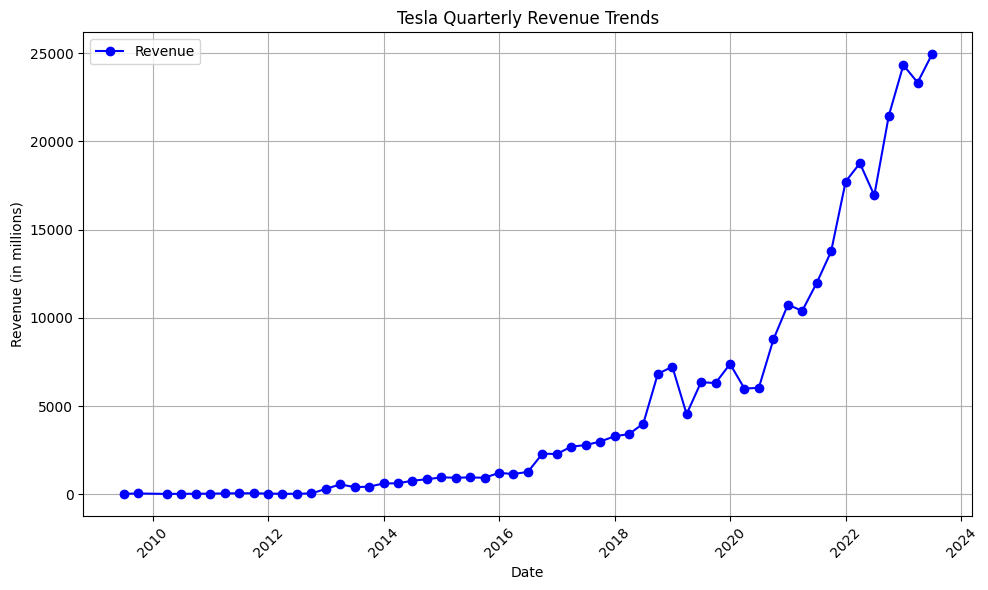

In [21]:
# Plotting a line chart
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Revenue'], marker='o', color='b', label='Revenue')
plt.title('Tesla Quarterly Revenue Trends')
plt.xlabel('Date')
plt.ylabel('Revenue (in millions)')
plt.xticks(rotation=45)  
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

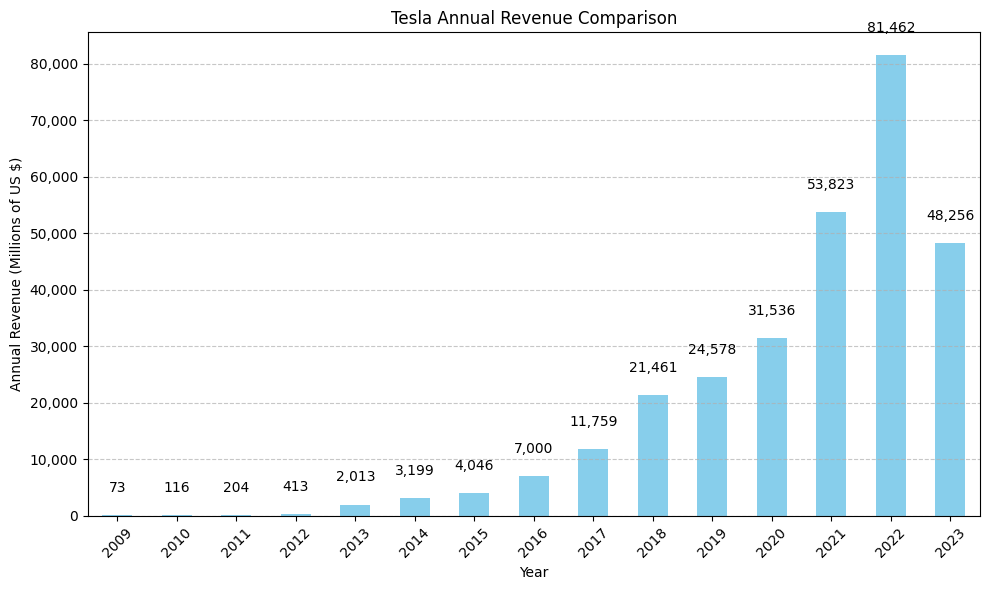

In [22]:
# Aggregate quarterly revenue to annual revenue
df['Year'] = df['Date'].dt.year
annual_revenue = df.groupby('Year')['Revenue'].sum()

# Create a bar chart for annual revenue comparison
plt.figure(figsize=(10, 6))
ax = annual_revenue.plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Annual Revenue (Millions of US $)')
plt.title('Tesla Annual Revenue Comparison')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Format and add total revenue values at the top of each bar without $
for i, v in enumerate(annual_revenue):
    formatted_value = '{:,.0f}'.format(v)  # Format revenue with commas
    ax.text(i, v + 0.05 * annual_revenue.max(), formatted_value, ha='center')

# Add comma separator to y-axis labels for millions
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()


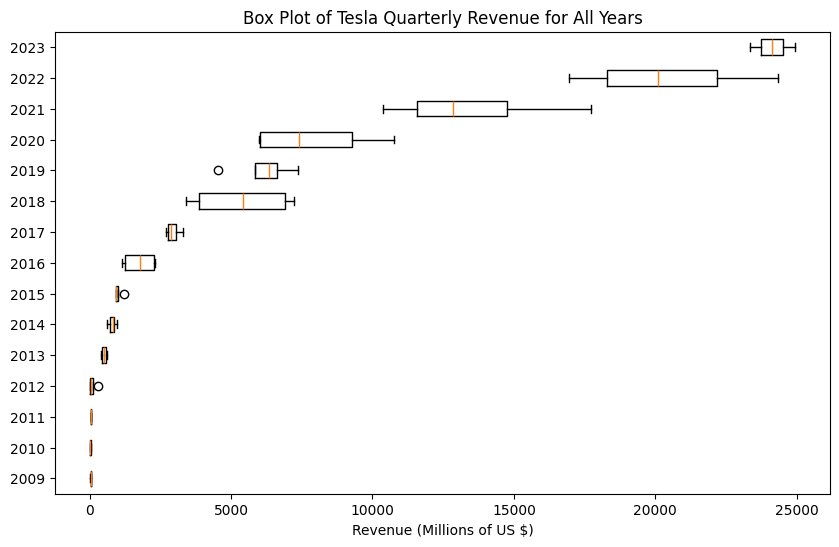

In [23]:
# Group data by year and create a list of revenue data for each year
grouped_data = [group['Revenue'].tolist() for _, group in df.groupby('Year')]

# Extract years for y-axis labels
years = sorted(df['Year'].unique())[::-1]

# Create a box plot for all years
plt.figure(figsize=(10, 6))
plt.boxplot(grouped_data, vert=False)
plt.title('Box Plot of Tesla Quarterly Revenue for All Years')
plt.xlabel('Revenue (Millions of US $)')
plt.yticks(range(1, len(years) + 1), reversed(years))
plt.show()
